In [1]:
import pickle
import sys

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
my_cmap = ListedColormap(sns.diverging_palette(220, 20, n=256).as_hex())

sys.path.append('../src')
import analyze
import raybay

In [259]:
def plotCompareD2cm(folder):
    # Load data
    weight = np.load(folder + '/weight/res_weight.pkl', allow_pickle=True)
    dose = np.load(folder + '/weight/res_dose.pkl', allow_pickle=True)
    limit = dose.opt_result.x_iters[-1][0]
    
    # Plot dose results
    fig, ax1 = plt.subplots()
    pars = [ii[0] for ii in dose.opt_result.x_iters]
    p, = ax1.plot(pars[1:], dose.goal_dict[1][1:], '.')
    l, = ax1.plot([0, limit], [limit, limit], ':', color='tab:green')
    ax1.set_xticks(np.linspace(0, limit, 6))
    ax1.tick_params(axis='x', colors='tab:blue')
    
    # Plot weight results
    ax2 = ax1.twiny()
    #ax2.plot([1, 10000], [dose.goal_dict[1][1], dose.goal_dict[1][-1]], '.', color='tab:blue')
    w, = ax2.plot(weight.opt_result.x_iters, weight.goal_dict[1], '.', color='tab:orange')
    ax2.set_xscale('log')
    ax2.tick_params(axis='x', colors='tab:orange')
    
    # Annotations
    ax1.set_xlabel(r'D2cm Parameter ($\theta$)')
    ax2.set_xlabel(r'D2cm Weight ($w$)')
    ax1.set_ylabel('D2cm MaxDose (cGy)')
    ax2.grid(False)

<Figure size 432x288 with 0 Axes>

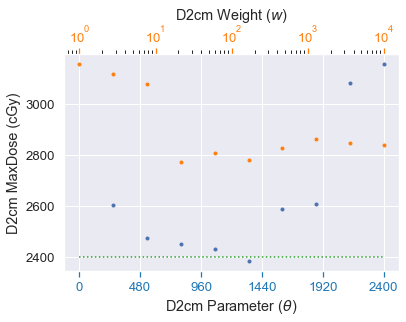

<Figure size 432x288 with 0 Axes>

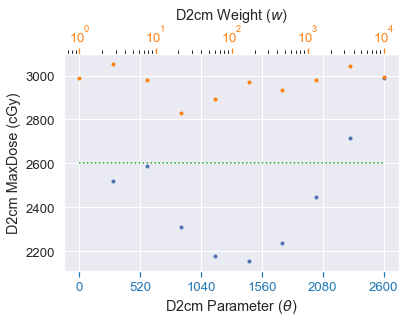

<Figure size 432x288 with 0 Axes>

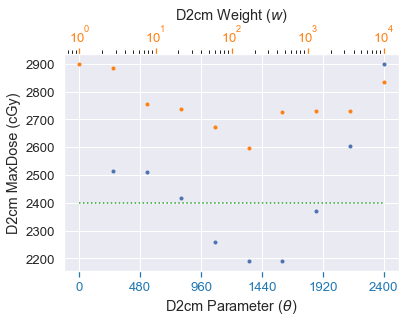

<Figure size 432x288 with 0 Axes>

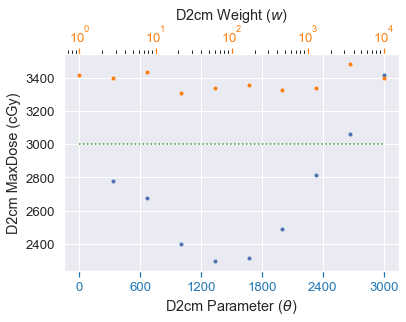

<Figure size 432x288 with 0 Axes>

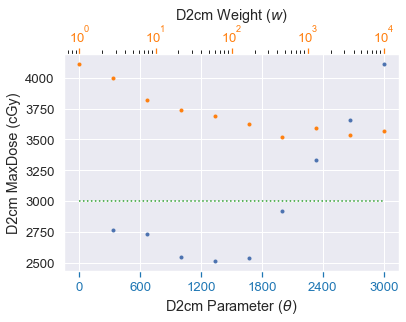

In [266]:
folders = ['SBRT_lung_minsun', 'ZZ_MK_LLungSBRT3778', 'ZZ_MK_RLungSBRT4076', 'ZZ_MK_RULungSBRT3796',
           'ZZ_MK_LLLungSBRT3977']
for ii in range(len(folders)):
    plt.figure()
    plotCompareD2cm(folders[ii])
    plt.savefig(f"compareP{ii+1}.png", bbox_inches='tight')